<a href="https://colab.research.google.com/github/hananedjellouadji/GMC_AI/blob/main/PROJET_AI_GMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [195]:
ds=pd.read_csv('wine_quality_data.csv', sep=';') #couldn't find better :/
ds

,fixed acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
601,7.3,0.51,0.18,2.1,0.070,12.0,28,0.99768,3.52,0.73,9.5,good
602,8.2,0.34,0.38,2.5,0.080,12.0,57,0.99780,3.30,0.47,9.0,good
603,8.6,0.33,0.40,2.6,0.083,16.0,68,0.99782,3.30,0.48,9.4,bad
604,7.2,0.50,0.18,2.1,0.071,12.0,31,0.99761,3.52,0.72,9.6,good


In [ ]:
ds['quality']=ds["quality"].map({'good':1,'bad':0})
ds.fillna(ds.mode(),inplace=True)
ds

In [197]:
ds.isnull().sum()

fixed acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

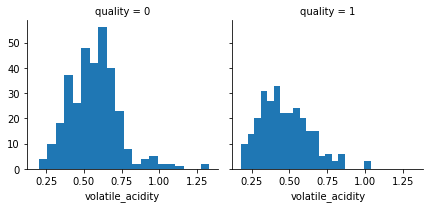

In [198]:
g=sns.FacetGrid(ds,col='quality')
g.map(plt.hist,'volatile_acidity', bins=20)
g.add_legend()

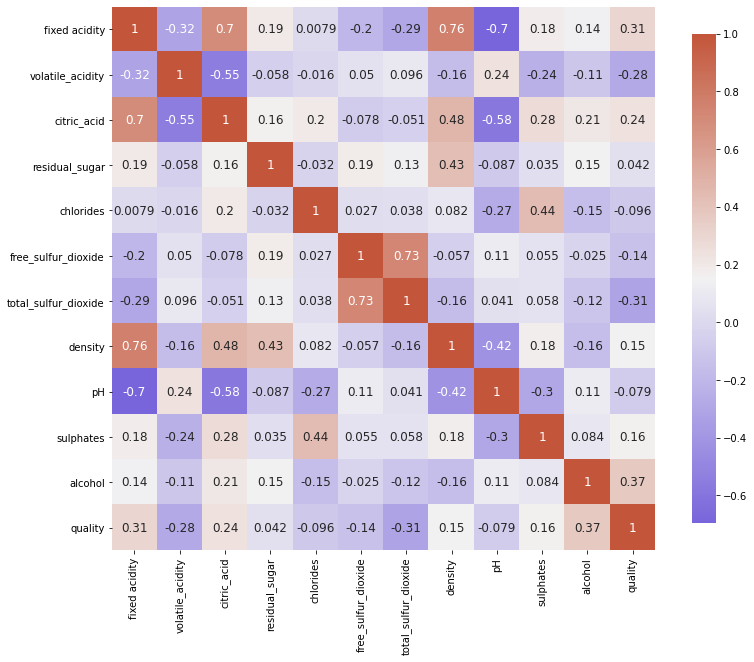

In [199]:
def plot_correlation_map(ds):
    corr=ds.corr()
    s,ax=plt.subplots(figsize=(13,10))
    cmap=sns.diverging_palette(270,20,as_cmap=True)
    s=sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize':12}
    )
plot_correlation_map(ds)

Accuracy=0.51


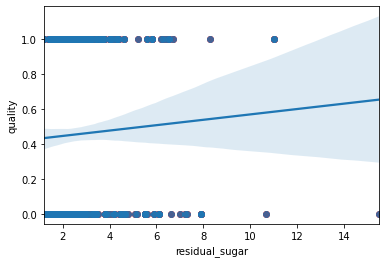

In [200]:
x=ds[['residual_sugar','pH']].values
y=ds['quality'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
plt.scatter(ds.residual_sugar,ds.quality, color='r')
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))
sns.regplot(x="residual_sugar",y='quality', data=ds)

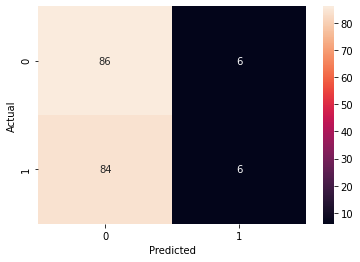

In [201]:
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cm,annot=True)

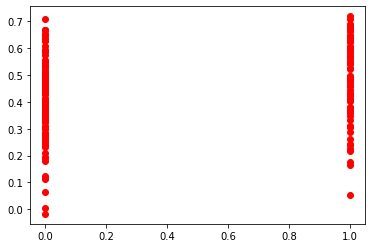

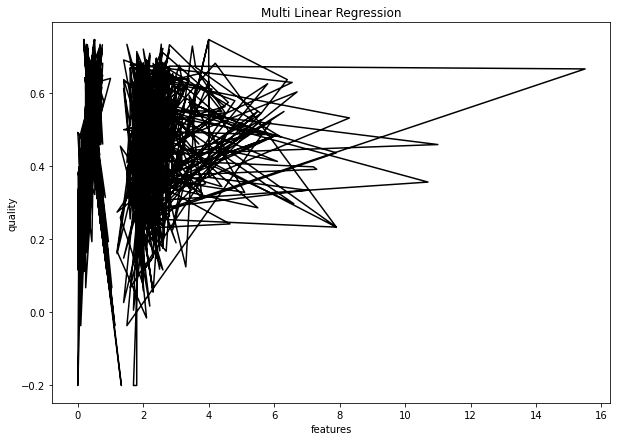

In [202]:
x=ds[['volatile_acidity','citric_acid','residual_sugar']].values
y=ds['quality'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
plt.scatter(y_test,predicted,color='r') 
plt.figure(figsize=(10,7))
plt.ylabel('quality')
plt.xlabel('features')
plt.title('Multi Linear Regression')
plt.plot(x,model.predict(x),color='k')
plt.show()

In [203]:
x=ds[['residual_sugar','volatile_acidity','fixed acidity','citric_acid']].values
y=ds['quality'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_pred,y_test))

Accuracy: 0.7142857142857143


In [204]:
n_neighbors=30
scores=[]
for k in range(1,30):
  knn=KNeighborsClassifier(n_neighbors-k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
  scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.73
Accuracy for k= 2 is: 0.73
Accuracy for k= 3 is: 0.71
Accuracy for k= 4 is: 0.72
Accuracy for k= 5 is: 0.71
Accuracy for k= 6 is: 0.71
Accuracy for k= 7 is: 0.7
Accuracy for k= 8 is: 0.71
Accuracy for k= 9 is: 0.7
Accuracy for k= 10 is: 0.71
Accuracy for k= 11 is: 0.69
Accuracy for k= 12 is: 0.7
Accuracy for k= 13 is: 0.69
Accuracy for k= 14 is: 0.7
Accuracy for k= 15 is: 0.67
Accuracy for k= 16 is: 0.68
Accuracy for k= 17 is: 0.68
Accuracy for k= 18 is: 0.7
Accuracy for k= 19 is: 0.69
Accuracy for k= 20 is: 0.7
Accuracy for k= 21 is: 0.68
Accuracy for k= 22 is: 0.73
Accuracy for k= 23 is: 0.7
Accuracy for k= 24 is: 0.73
Accuracy for k= 25 is: 0.69
Accuracy for k= 26 is: 0.7
Accuracy for k= 27 is: 0.67
Accuracy for k= 28 is: 0.71
Accuracy for k= 29 is: 0.73


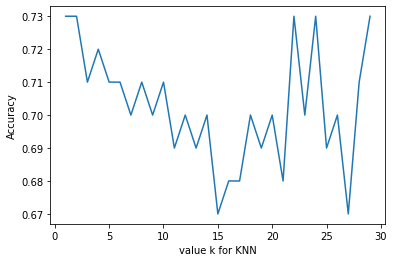

In [205]:
plt.plot(range(1,30),scores)
plt.xlabel('value k for KNN')
plt.ylabel('Accuracy')
plt.show()

In [206]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
print('DT depth :', dtree.get_depth())
print("Score:{}".format(accuracy_score(y_pred,y_test)))

DT depth : 16
Score:0.6868131868131868


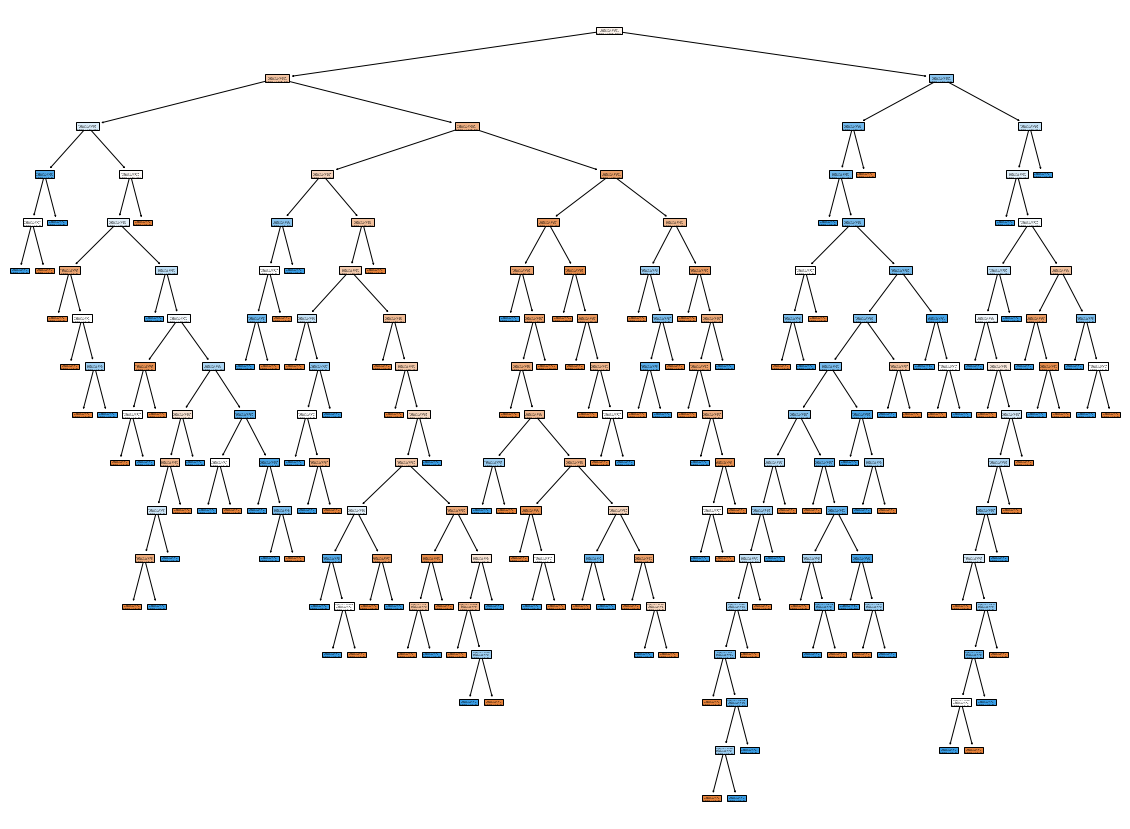

In [207]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(dtree.fit(x_train,y_train),filled=True)

In [208]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=11, random_state=None)
model = regr.fit(x_train, y_train)
viz = dtreeviz(regr, x_train, y_train, target_name="Quality", feature_names='features')
viz

In [209]:
rfc = RandomForestClassifier(criterion='gini', n_estimators=200, min_samples_split=4,min_samples_leaf=1,  max_features='auto', random_state=1)
result_rm=cross_val_score(rfc,x_train,y_train,cv=10,scoring='accuracy')
print('cross validated score:',round(result_rm.mean()*100,2))

cross validated score: 72.42


In [ ]:
df=ds.drop('quality',axis=1)
df

In [214]:
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
clust_labels=model.fit_predict(df)
agglo=pd.DataFrame(clust_labels)
agglo

,0
0,3
1,1
2,1
3,1
4,3
...,...
601,3
602,1
603,1
604,3


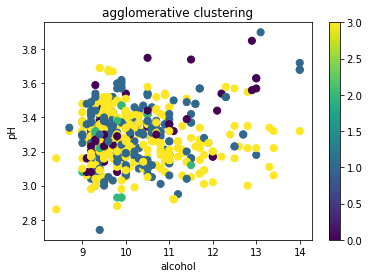

In [215]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df['alcohol'],df['pH'],c=agglo[0],s=50)
ax.set_title('agglomerative clustering')
ax.set_xlabel('alcohol')
ax.set_ylabel('pH')
plt.colorbar(scatter)

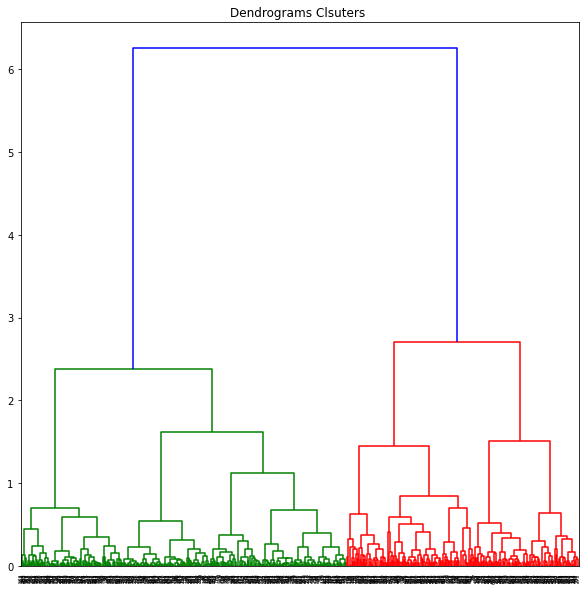

In [216]:
d_scaled = normalize(df)
d_scaled = pd.DataFrame(d_scaled, columns=df.columns)
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms Clsuters ")  
dend = shc.dendrogram(shc.linkage(d_scaled, method='ward'))

In [230]:
kmeans=KMeans(n_clusters=7,random_state=0)
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,6
1,4
2,0
3,4
4,6
...,...
601,6
602,0
603,4
604,6


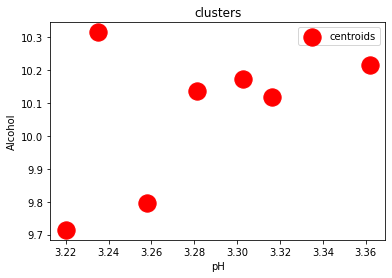

In [231]:
plt.scatter(kmeans.cluster_centers_[:,8],kmeans.cluster_centers_[:,10],s=300,c='red',label='centroids')
plt.title('clusters')
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

Text(0, 0.5, 'alcohol')

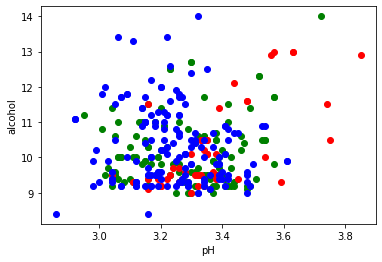

In [232]:
clusters_pred = kmeans.fit_predict(df)
df['cluster'] = clusters_pred

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
plt.scatter(df0['pH'],df0['alcohol'],color='green')
plt.scatter(df1['pH'],df1['alcohol'],color='red')
plt.scatter(df2['pH'],df2['alcohol'],color='blue')
plt.xlabel("pH")
plt.ylabel("alcohol")

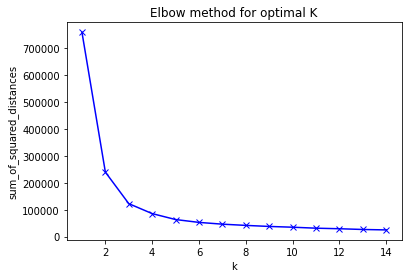

In [233]:
sum_of_squared_distances=[]
K=range(1,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(df)
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('k') 
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow method for optimal K')
plt.show()

In [234]:
knn_r_acc = []
for i in range( 1 , 10 , 1 ):
    knn = KNeighborsRegressor ( n_neighbors = i )
    knn.fit (x_train, y_train)    
    test_score = knn.score(x_test,y_test)
    train_score = knn.score(x_train,y_train)    
    knn_r_acc.append((i, test_score ,train_score))

dff = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(dff)

   K  Test Score  Train Score
0  1   -0.138639     1.000000
1  2   -0.019082     0.638346
2  3    0.068847     0.481026
3  4    0.063470     0.356469
4  5    0.094555     0.317349
5  6    0.153612     0.302431
6  7    0.143465     0.276017
7  8    0.137837     0.242270
8  9    0.147567     0.212083


In [235]:
te=TransactionEncoder()
te_ary=te.fit(df).transform(df)
data=pd.DataFrame(te_ary,columns=te.columns_)
data

,,H,_,a,c,d,e,f,g,h,i,l,n,o,p,r,s,t,u,v,x,y
0,True,False,False,True,True,True,True,True,False,False,True,False,False,False,False,False,False,True,False,False,True,True
1,False,False,True,True,True,True,True,False,False,False,True,True,False,True,False,False,False,True,False,True,False,True
2,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
3,False,False,True,True,False,True,True,False,True,False,True,True,False,False,False,True,True,False,True,False,False,False
4,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
602,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [236]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_sets = data.applymap(encode_units)
frequent_itemsets=apriori(df_sets,min_support=0.001,use_colnames=True)
association_rules(frequent_itemsets,metric='confidence',min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( ),(a),0.00165,0.011551,0.00165,1.0,86.571429,0.001631,inf
1,( ),(c),0.00165,0.009901,0.00165,1.0,101.000000,0.001634,inf
2,( ),(d),0.00165,0.013201,0.00165,1.0,75.750000,0.001628,inf
3,( ),(e),0.00165,0.014851,0.00165,1.0,67.333333,0.001626,inf
4,( ),(f),0.00165,0.004950,0.00165,1.0,202.000000,0.001642,inf
...,...,...,...,...,...,...,...,...,...
874233,"(r, o, t)","(d, s, f, e, _, a, u, x, l, i)",0.00165,0.001650,0.00165,1.0,606.000000,0.001647,inf
874234,"(r, t, f)","(d, s, e, _, a, o, u, x, l, i)",0.00165,0.001650,0.00165,1.0,606.000000,0.001647,inf
874235,"(r, t, x)","(d, s, f, e, _, a, o, u, l, i)",0.00165,0.001650,0.00165,1.0,606.000000,0.001647,inf
874236,"(f, o, t)","(d, s, e, _, a, r, u, x, l, i)",0.00165,0.001650,0.00165,1.0,606.000000,0.001647,inf


In [237]:
association_rules(frequent_itemsets,metric='lift',min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(a),( ),0.011551,0.001650,0.00165,0.142857,86.571429,0.001631,1.164741
1,( ),(a),0.001650,0.011551,0.00165,1.000000,86.571429,0.001631,inf
2,( ),(c),0.001650,0.009901,0.00165,1.000000,101.000000,0.001634,inf
3,(c),( ),0.009901,0.001650,0.00165,0.166667,101.000000,0.001634,1.198020
4,(d),( ),0.013201,0.001650,0.00165,0.125000,75.750000,0.001628,1.140971
...,...,...,...,...,...,...,...,...,...
1862067,(f),"(d, l, s, u, _, a, r, o, t, x, e, i)",0.004950,0.001650,0.00165,0.333333,202.000000,0.001642,1.497525
1862068,(t),"(d, l, s, u, _, a, r, o, f, x, e, i)",0.011551,0.001650,0.00165,0.142857,86.571429,0.001631,1.164741
1862069,(x),"(d, l, s, u, _, a, r, o, f, t, e, i)",0.004950,0.001650,0.00165,0.333333,202.000000,0.001642,1.497525
1862070,(e),"(d, l, s, u, _, a, r, o, f, t, x, i)",0.014851,0.001650,0.00165,0.111111,67.333333,0.001626,1.123144
